In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import random

#### Đọc dữ liệu

In [4]:
# Tạo DataFrame
df = pd.read_csv('sinh_vien_data.csv')

# Lưu dữ liệu vào file CSV
df

,Họ và tên,Điểm 1,Điểm 2,Điểm 3,Điểm thi
0,Phan Trọng Tú,9,4,9,10
1,Lê Trọng Hương,7,0,7,7
2,Phạm Quốc Nam,8,2,4,5
3,Đặng Duy Trang,2,9,5,8
4,Phan Anh Nam,0,9,1,3
...,...,...,...,...,...
1995,Bùi Hữu Hạnh,1,8,0,4
1996,Hoàng Tấn Khánh,6,5,8,8
1997,Đỗ Minh Phương,10,7,4,9
1998,Trần Anh Hạnh,10,0,9,8


#### Vẽ các biểu đồ phân phối các cột của dữ liệu

##### Cột điểm 1

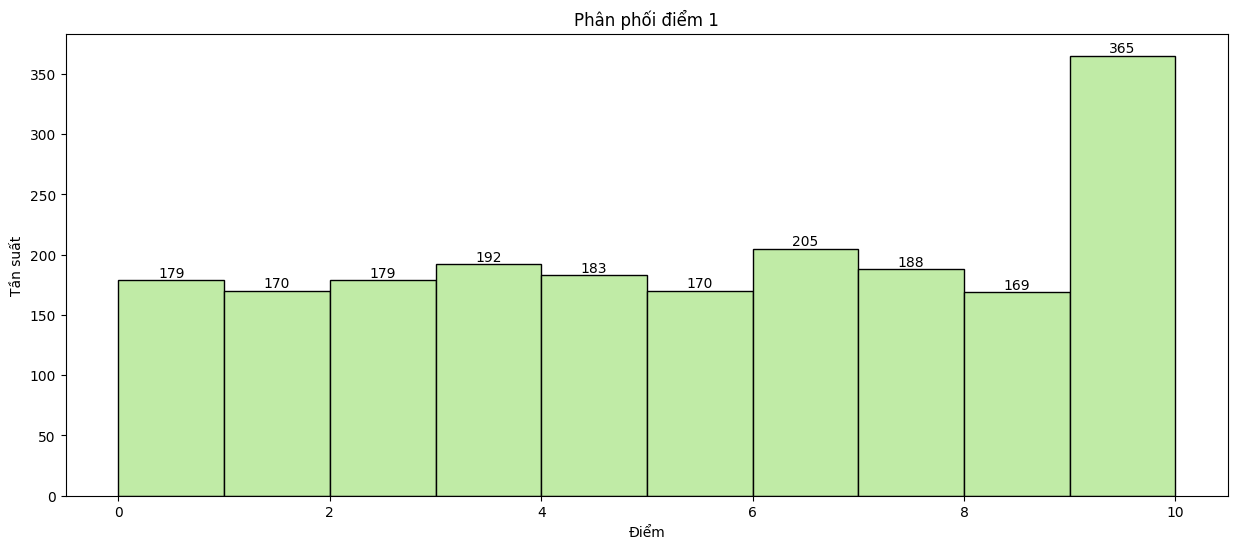

In [5]:
# Tạo figure và vẽ histogram
plt.figure(figsize=(15,6))
counts, bins, patches = plt.hist(df["Điểm 1"], bins=10, color='#C0EBA6', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối điểm 1')
plt.xlabel('Điểm')
plt.ylabel('Tần suất')

# Thêm nhãn số liệu lên các cột của biểu đồ
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2,  # Vị trí x của nhãn (giữa cột)
             count,                                 # Vị trí y của nhãn (tần suất)
             str(int(count)),                       # Nội dung nhãn (tần suất dưới dạng số nguyên)
             ha='center',                           # Canh giữa
             va='bottom')                           # Đặt nhãn phía trên cột

# Hiển thị biểu đồ
plt.show()


##### Cột điểm 2

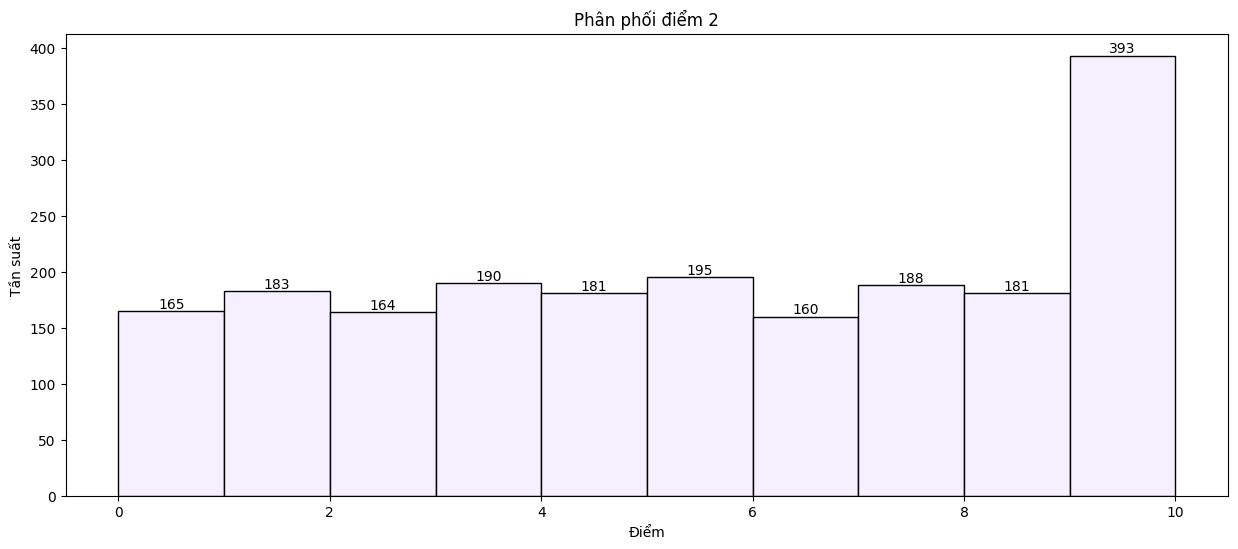

In [6]:
# Tạo figure và vẽ histogram
plt.figure(figsize=(15,6))
counts, bins, patches = plt.hist(df["Điểm 2"], bins=10, color='#F5EFFF', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối điểm 2')
plt.xlabel('Điểm')
plt.ylabel('Tần suất')

# Thêm nhãn số liệu lên các cột của biểu đồ
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2,  # Vị trí x của nhãn (giữa cột)
             count,                                 # Vị trí y của nhãn (tần suất)
             str(int(count)),                       # Nội dung nhãn (tần suất dưới dạng số nguyên)
             ha='center',                           # Canh giữa
             va='bottom')                           # Đặt nhãn phía trên cột

# Hiển thị biểu đồ
plt.show()


##### Cột điểm 3

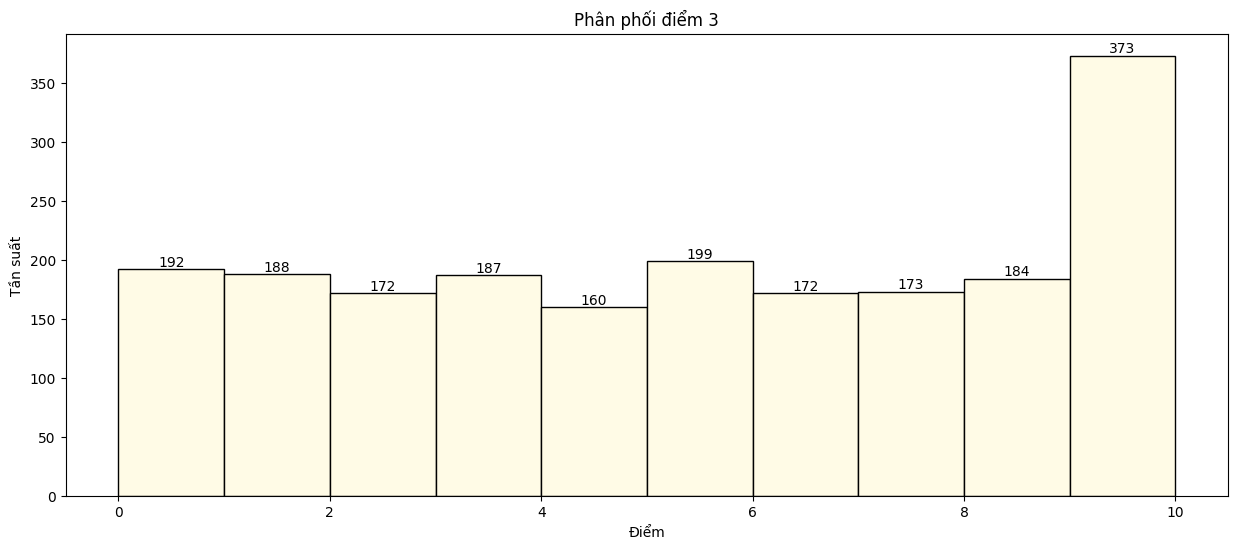

In [7]:

# Tạo figure và vẽ histogram
plt.figure(figsize=(15,6))
counts, bins, patches = plt.hist(df["Điểm 3"], bins=10, color='#FFFBE6', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối điểm 3')
plt.xlabel('Điểm')
plt.ylabel('Tần suất')

# Thêm nhãn số liệu lên các cột của biểu đồ
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2,  # Vị trí x của nhãn (giữa cột)
             count,                                 # Vị trí y của nhãn (tần suất)
             str(int(count)),                       # Nội dung nhãn (tần suất dưới dạng số nguyên)
             ha='center',                           # Canh giữa
             va='bottom')                           # Đặt nhãn phía trên cột

# Hiển thị biểu đồ
plt.show()


##### Cột điểm thi

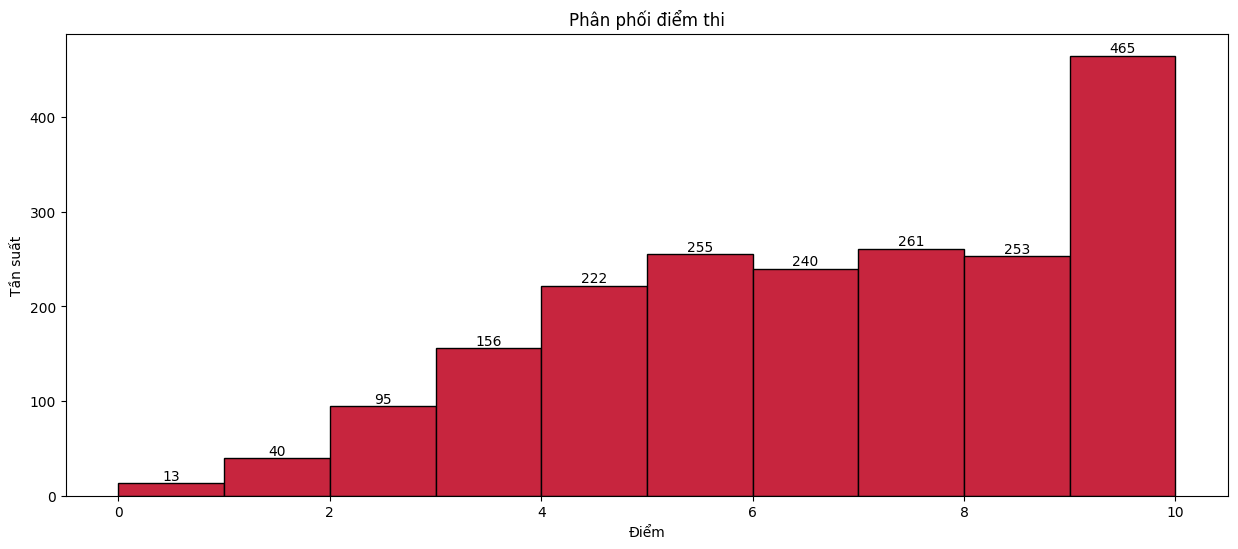

In [8]:

# Tạo figure và vẽ histogram
plt.figure(figsize=(15,6))
counts, bins, patches = plt.hist(df["Điểm thi"], bins=10, color='#C7253E', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối điểm thi')
plt.xlabel('Điểm')
plt.ylabel('Tần suất')

# Thêm nhãn số liệu lên các cột của biểu đồ
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2,  # Vị trí x của nhãn (giữa cột)
             count,                                 # Vị trí y của nhãn (tần suất)
             str(int(count)),                       # Nội dung nhãn (tần suất dưới dạng số nguyên)
             ha='center',                           # Canh giữa
             va='bottom')                           # Đặt nhãn phía trên cột

# Hiển thị biểu đồ
plt.show()


#### Huấn luyện mô hình

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

##### Chọn ra các features và chia tập train-test

In [10]:
X = df.drop(columns=["Họ và tên", "Điểm thi"])
y = df["Điểm thi"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

##### Chuẩn hóa dữ liệu của các features

In [12]:
# Chuẩn hóa dữ liệu
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Mô hình Linear Regression

In [47]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
mape_lr = mean_absolute_percentage_error(y_test, y_pred)
rmse_lr = root_mean_squared_error(y_test, y_pred)

##### Mô hình CNN

Epoch 1/500, Train Loss: 179.6404, Test Loss: 106.0064
Epoch 2/500, Train Loss: 77.3339, Test Loss: 44.0685
Epoch 3/500, Train Loss: 28.7716, Test Loss: 15.2909
Epoch 4/500, Train Loss: 10.5162, Test Loss: 6.5199
Epoch 5/500, Train Loss: 5.4571, Test Loss: 3.8642
Epoch 6/500, Train Loss: 3.5458, Test Loss: 2.6375
Epoch 7/500, Train Loss: 2.6018, Test Loss: 2.0056
Epoch 8/500, Train Loss: 2.0651, Test Loss: 1.6004
Epoch 9/500, Train Loss: 1.6987, Test Loss: 1.3201
Epoch 10/500, Train Loss: 1.4324, Test Loss: 1.1170
Epoch 11/500, Train Loss: 1.2419, Test Loss: 0.9813
Epoch 12/500, Train Loss: 1.1097, Test Loss: 0.8872
Epoch 13/500, Train Loss: 1.0158, Test Loss: 0.8193
Epoch 14/500, Train Loss: 0.9472, Test Loss: 0.7684
Epoch 15/500, Train Loss: 0.8959, Test Loss: 0.7298
Epoch 16/500, Train Loss: 0.8555, Test Loss: 0.6995
Epoch 17/500, Train Loss: 0.8229, Test Loss: 0.6755
Epoch 18/500, Train Loss: 0.7959, Test Loss: 0.6567
Epoch 19/500, Train Loss: 0.7728, Test Loss: 0.6408
Epoch 20/500

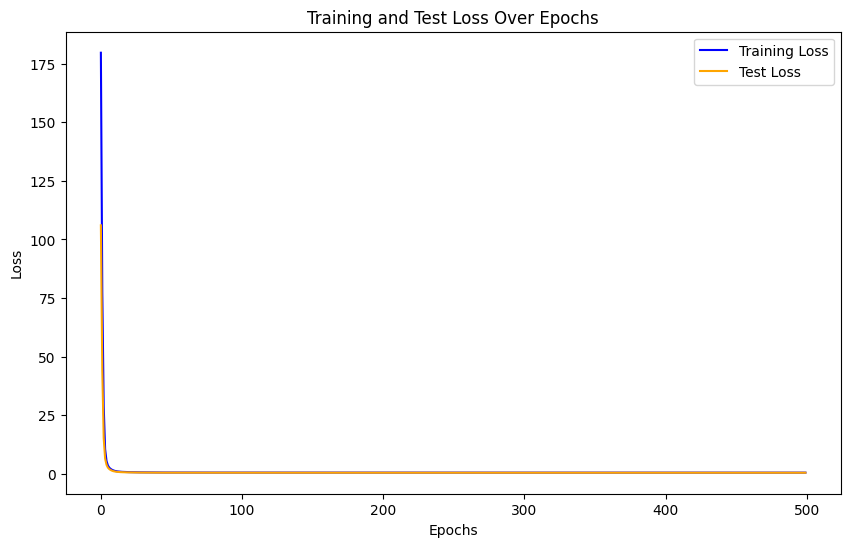

In [38]:
import tensorflow as tf

class CNNModel(tf.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = tf.Variable(tf.random.normal([1, 1, 1, 32]), name='conv1_weights', dtype=tf.float32)  # Lớp Conv2D với 32 filters
        self.dense1 = tf.Variable(tf.random.normal([96, 48]), name='dense1_weights', dtype=tf.float32)  # Fully connected layer 1
        self.dense2 = tf.Variable(tf.random.normal([48, 1]), name='dense2_weights', dtype=tf.float32)   # Fully connected layer 2

    def __call__(self, x):
        x = tf.reshape(x, [-1, 3, 1, 1])  # Reshape input thành [batch_size, height=2, width=1, channels=1]
        conv = tf.nn.conv2d(x, self.conv1, strides=[1, 1, 1, 1], padding="VALID")
        conv = tf.nn.relu(conv)  # Activation ReLU
        conv_flat = tf.reshape(conv, [-1, 96])  # Flatten
        dense1_out = tf.matmul(conv_flat, self.dense1)
        dense1_out = tf.nn.relu(dense1_out)  # Activation ReLU
        output = tf.matmul(dense1_out, self.dense2)  # Output layer
        return output
    
# Khởi tạo mô hình
model = CNNModel()

# Hàm mất mát (loss function)
loss_fn = tf.losses.MeanSquaredError()

# Optimizer
optimizer = tf.optimizers.Adam(learning_rate=0.001)

# Hàm huấn luyện một batch
@tf.function
def train_step(X, y):
    with tf.GradientTape() as tape:
        predictions = model(X)
        loss = loss_fn(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# Giả định đã có dữ liệu X_train, y_train, X_test, y_test
X_train_dl = X_train.astype(np.float32)
y_train_dl = y_train.astype(np.float32)
X_test_dl = X_test.astype(np.float32)
y_test_dl = y_test.astype(np.float32)

# Lưu giá trị loss
train_loss_values = []
test_loss_values = []

# Huấn luyện mô hình
epochs = 500
batch_size = 32
for epoch in range(epochs):
    epoch_loss = 0
    # Huấn luyện
    for i in range(0, len(X_train_dl), batch_size):
        X_batch = X_train_dl[i:i + batch_size]
        y_batch = y_train_dl[i:i + batch_size]
        loss = train_step(X_batch, y_batch)
        epoch_loss += loss.numpy()
    
    avg_train_loss = epoch_loss / (len(X_train_dl) // batch_size)
    train_loss_values.append(avg_train_loss)

    # Tính loss của tập test
    test_predictions = model(X_test_dl)
    test_loss = loss_fn(y_test_dl, test_predictions)
    avg_test_loss = test_loss.numpy()
    test_loss_values.append(avg_test_loss)

    print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')

# Vẽ biểu đồ loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss_values, label='Training Loss', color='blue')
plt.plot(test_loss_values, label='Test Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()


In [49]:
# test_loss = loss_fn(y_test_dl, model(X_test_dl)).numpy()
y_pred = model(X_test_dl)

In [50]:
mse_cnn = mean_squared_error(y_test_dl, y_pred)
mae_cnn = mean_absolute_error(y_test_dl, y_pred)
mape_cnn = mean_absolute_percentage_error(y_test_dl, y_pred)
rmse_cnn = root_mean_squared_error(y_test_dl, y_pred)

In [41]:
# save model
np.save('conv1_weights.npy', model.conv1.numpy())
np.save('dense1_weights.npy', model.dense1.numpy())
np.save('dense2_weights.npy', model.dense2.numpy())

##### Mô hình RNN

In [22]:
import tensorflow as tf

# Giả định đã có dữ liệu X_train, y_train, X_test, y_test
# Dưới đây là mô hình RNN được định nghĩa như trên
class SimpleRNN:
    def __init__(self, input_size, hidden_size):
        self.hidden_size = hidden_size
        self.Wxh = tf.Variable(tf.random.normal([input_size, hidden_size]), name='Wxh')
        self.Whh = tf.Variable(tf.random.normal([hidden_size, hidden_size]), name='Whh')
        self.bh = tf.Variable(tf.zeros([hidden_size]), name='bh')
        self.Why = tf.Variable(tf.random.normal([hidden_size, 1]), name='Why')
        self.by = tf.Variable(tf.zeros([1]), name='by')

    def step(self, x, h):
        h = tf.tanh(tf.matmul(x, self.Wxh) + tf.matmul(h, self.Whh) + self.bh)
        y = tf.matmul(h, self.Why) + self.by
        return y, h

    def forward(self, x):
        h = tf.zeros([x.shape[0], self.hidden_size])  # Initialize hidden state
        for t in range(x.shape[1]):  # Loop over time steps
            y, h = self.step(x[:, t, :], h)
        return y

    @property
    def trainable_variables(self):
        return [self.Wxh, self.Whh, self.bh, self.Why, self.by]

# Tạo mô hình
model = SimpleRNN(input_size=3, hidden_size=64)

# Tạo optimizer
optimizer = tf.optimizers.Adam()

# Hàm tính loss
loss_fn = tf.losses.MeanSquaredError()

@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        predictions = model.forward(x)
        loss = loss_fn(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# Hàm tính loss trên tập test
@tf.function
def test_loss(x, y):
    predictions = model.forward(x)
    loss = loss_fn(y, predictions)
    return loss

# Chuyển đổi dữ liệu sang định dạng phù hợp
X_train_dl = X_train.astype(np.float32).reshape(-1, 1, 3)
y_train_dl = y_train.values.astype(np.float32).reshape(-1, 1, 1)
X_test_dl = X_test.astype(np.float32).reshape(-1, 1, 3)
y_test_dl = y_test.values.astype(np.float32).reshape(-1, 1, 1)

# Định nghĩa số epoch và batch size
epochs = 500
batch_size = 32

# List lưu loss để vẽ biểu đồ
train_losses = []
test_losses = []

# Vòng lặp huấn luyện
for epoch in range(epochs):
    # Huấn luyện trên tập train
    for i in range(0, len(X_train_dl), batch_size):
        X_batch = X_train_dl[i:i + batch_size]
        y_batch = y_train_dl[i:i + batch_size]
        train_loss = train_step(X_batch, y_batch)
    
    # Tính loss trên tập test sau mỗi epoch
    test_loss_value = test_loss(X_test_dl, y_test_dl)
    
    # Lưu lại loss để vẽ biểu đồ
    train_losses.append(train_loss.numpy())
    test_losses.append(test_loss_value.numpy())
    
    print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss.numpy():.4f}, Test Loss: {test_loss_value.numpy():.4f}')

Epoch 1/500, Train Loss: 34.7928, Test Loss: 29.0341
Epoch 2/500, Train Loss: 10.5665, Test Loss: 9.6600
Epoch 3/500, Train Loss: 5.5413, Test Loss: 5.9652
Epoch 4/500, Train Loss: 4.1295, Test Loss: 4.7257
Epoch 5/500, Train Loss: 3.2969, Test Loss: 3.8256
Epoch 6/500, Train Loss: 2.6881, Test Loss: 3.1350
Epoch 7/500, Train Loss: 2.2327, Test Loss: 2.6130
Epoch 8/500, Train Loss: 1.8933, Test Loss: 2.2196
Epoch 9/500, Train Loss: 1.6413, Test Loss: 1.9231
Epoch 10/500, Train Loss: 1.4547, Test Loss: 1.6995
Epoch 11/500, Train Loss: 1.3167, Test Loss: 1.5309
Epoch 12/500, Train Loss: 1.2149, Test Loss: 1.4037
Epoch 13/500, Train Loss: 1.1394, Test Loss: 1.3075
Epoch 14/500, Train Loss: 1.0828, Test Loss: 1.2340
Epoch 15/500, Train Loss: 1.0395, Test Loss: 1.1768
Epoch 16/500, Train Loss: 1.0051, Test Loss: 1.1310
Epoch 17/500, Train Loss: 0.9766, Test Loss: 1.0932
Epoch 18/500, Train Loss: 0.9520, Test Loss: 1.0608
Epoch 19/500, Train Loss: 0.9299, Test Loss: 1.0322
Epoch 20/500, Trai

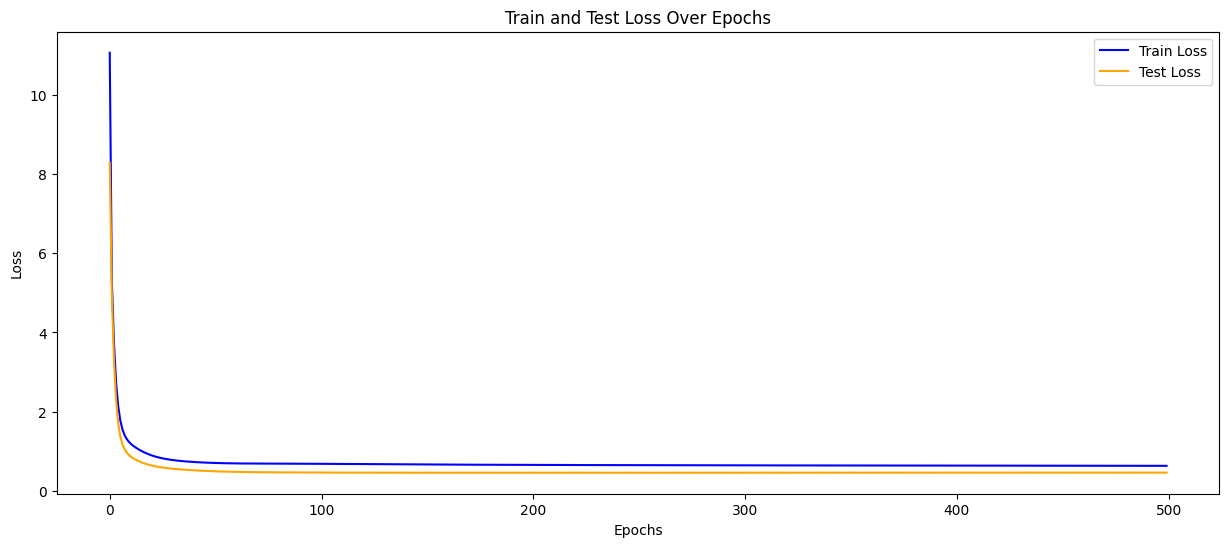

In [52]:
# Vẽ biểu đồ loss
plt.figure(figsize=(15, 6))
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(test_losses, label='Test Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss Over Epochs')
plt.legend()
plt.show()

In [53]:
y_pred = model.forward(X_test_dl.reshape(-1, 1, 3))

In [54]:
y_test_dl = y_test_dl.reshape(-1, 1)
y_test_dl.shape

(400, 1)

In [55]:
mse_rnn = mean_squared_error(y_test, y_pred)
mae_rnn = mean_absolute_error(y_test_dl, y_pred)
mape_rnn = mean_absolute_percentage_error(y_test_dl, y_pred)
rmse_rnn = root_mean_squared_error(y_test_dl, y_pred)

In [31]:
for i in model.trainable_variables:
    np.save(f'{i.name[:-2]}.npy', i.numpy())

In [56]:
from tensorflow.keras import layers, models

input_shape = (3, 1)  # 2 đặc trưng và 1 kênh (channel)

# Xây dựng mô hình CNN
model = models.Sequential([
    layers.Input(shape=input_shape),                      # Layer 1: Input layer
    layers.Conv1D(32, kernel_size=1, activation='relu'),   # Layer 2: Convolutional layer
    layers.Conv1D(64, kernel_size=1, activation='relu'),   # Layer 3: Convolutional layer
    layers.Flatten(),                                     # Layer 4: Flatten layer
    layers.Dense(64, activation='relu'),                   # Layer 5: Fully connected layer
    layers.Dense(1)                                        # Output layer: Dự đoán điểm cuối cùng
])

# Compile mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# In tóm tắt mô hình
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 3, 32)          │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 3, 64)          │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,593 (57.00 KB)

 Trainable params: 14,593 (57.00 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))   

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 38.3418 - val_loss: 2.1698
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1124 - val_loss: 1.3504
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2084 - val_loss: 0.8724
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8398 - val_loss: 0.6143
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6430 - val_loss: 0.5111
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5646 - val_loss: 0.4959
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5574 - val_loss: 0.4902
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5361 - val_loss: 0.5038
Epoch 9/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5488 - val_loss: 0.5242
Epoch 10/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5616 - val_loss: 0.4873
Epoch 11/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5334 - val_loss: 0.5103
Epoch 12/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5512 - val_l

In [58]:
model.save("cnn.h5")

In [59]:
y_pred = model.predict(X_test)

mse_cnn_keras = mean_squared_error(y_test, y_pred)
mae_cnn_keras = mean_absolute_error(y_test, y_pred)
mape_cnn_keras = mean_absolute_percentage_error(y_test, y_pred)
rmse_cnn_keras = root_mean_squared_error(y_test, y_pred)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [60]:
model = models.Sequential([
    layers.Input(shape=(3, 1)),                     # Layer 1: Input layer
    layers.SimpleRNN(32, activation='relu', return_sequences=True),  # Layer 2: RNN layer (trả về toàn bộ chuỗi)
    layers.SimpleRNN(64, activation='relu'),        # Layer 3: RNN layer
    layers.Dense(32, activation='relu'),            # Layer 4: Fully connected layer
    layers.Dense(1)                                 # Output layer: Dự đoán điểm cuối cùng
])

# Compile mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# In tóm tắt mô hình
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)        │ (None, 3, 32)          │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_7 (SimpleRNN)        │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,409 (36.75 KB)

 Trainable params: 9,409 (36.75 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 38.6496 - val_loss: 4.9959
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0102 - val_loss: 2.5767
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1675 - val_loss: 1.2818
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9911 - val_loss: 0.5589
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6020 - val_loss: 0.5210
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6121 - val_loss: 0.5132
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5742 - val_loss: 0.5853
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6045 - val_loss: 0.6027
Epoch 9/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5953 - val_loss: 0.5304
Epoch 10/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5702 - val_loss: 0.4907
Epoch 11/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5312 - val_loss: 0.5481
Epoch 12/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5561 - val_l

In [62]:
y_pred = model.predict(X_test)

mse_rnn_keras = mean_squared_error(y_test, y_pred)
mae_rnn_keras = mean_absolute_error(y_test, y_pred)
mape_rnn_keras = mean_absolute_percentage_error(y_test, y_pred)
rmse_rnn_keras = root_mean_squared_error(y_test, y_pred)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [63]:
# Save model
model.save('rnn.h5')

#### So sánh độ mất mát của 5 mô hình Linear Regression - CNN - RNN - CNN keras - RNN keras

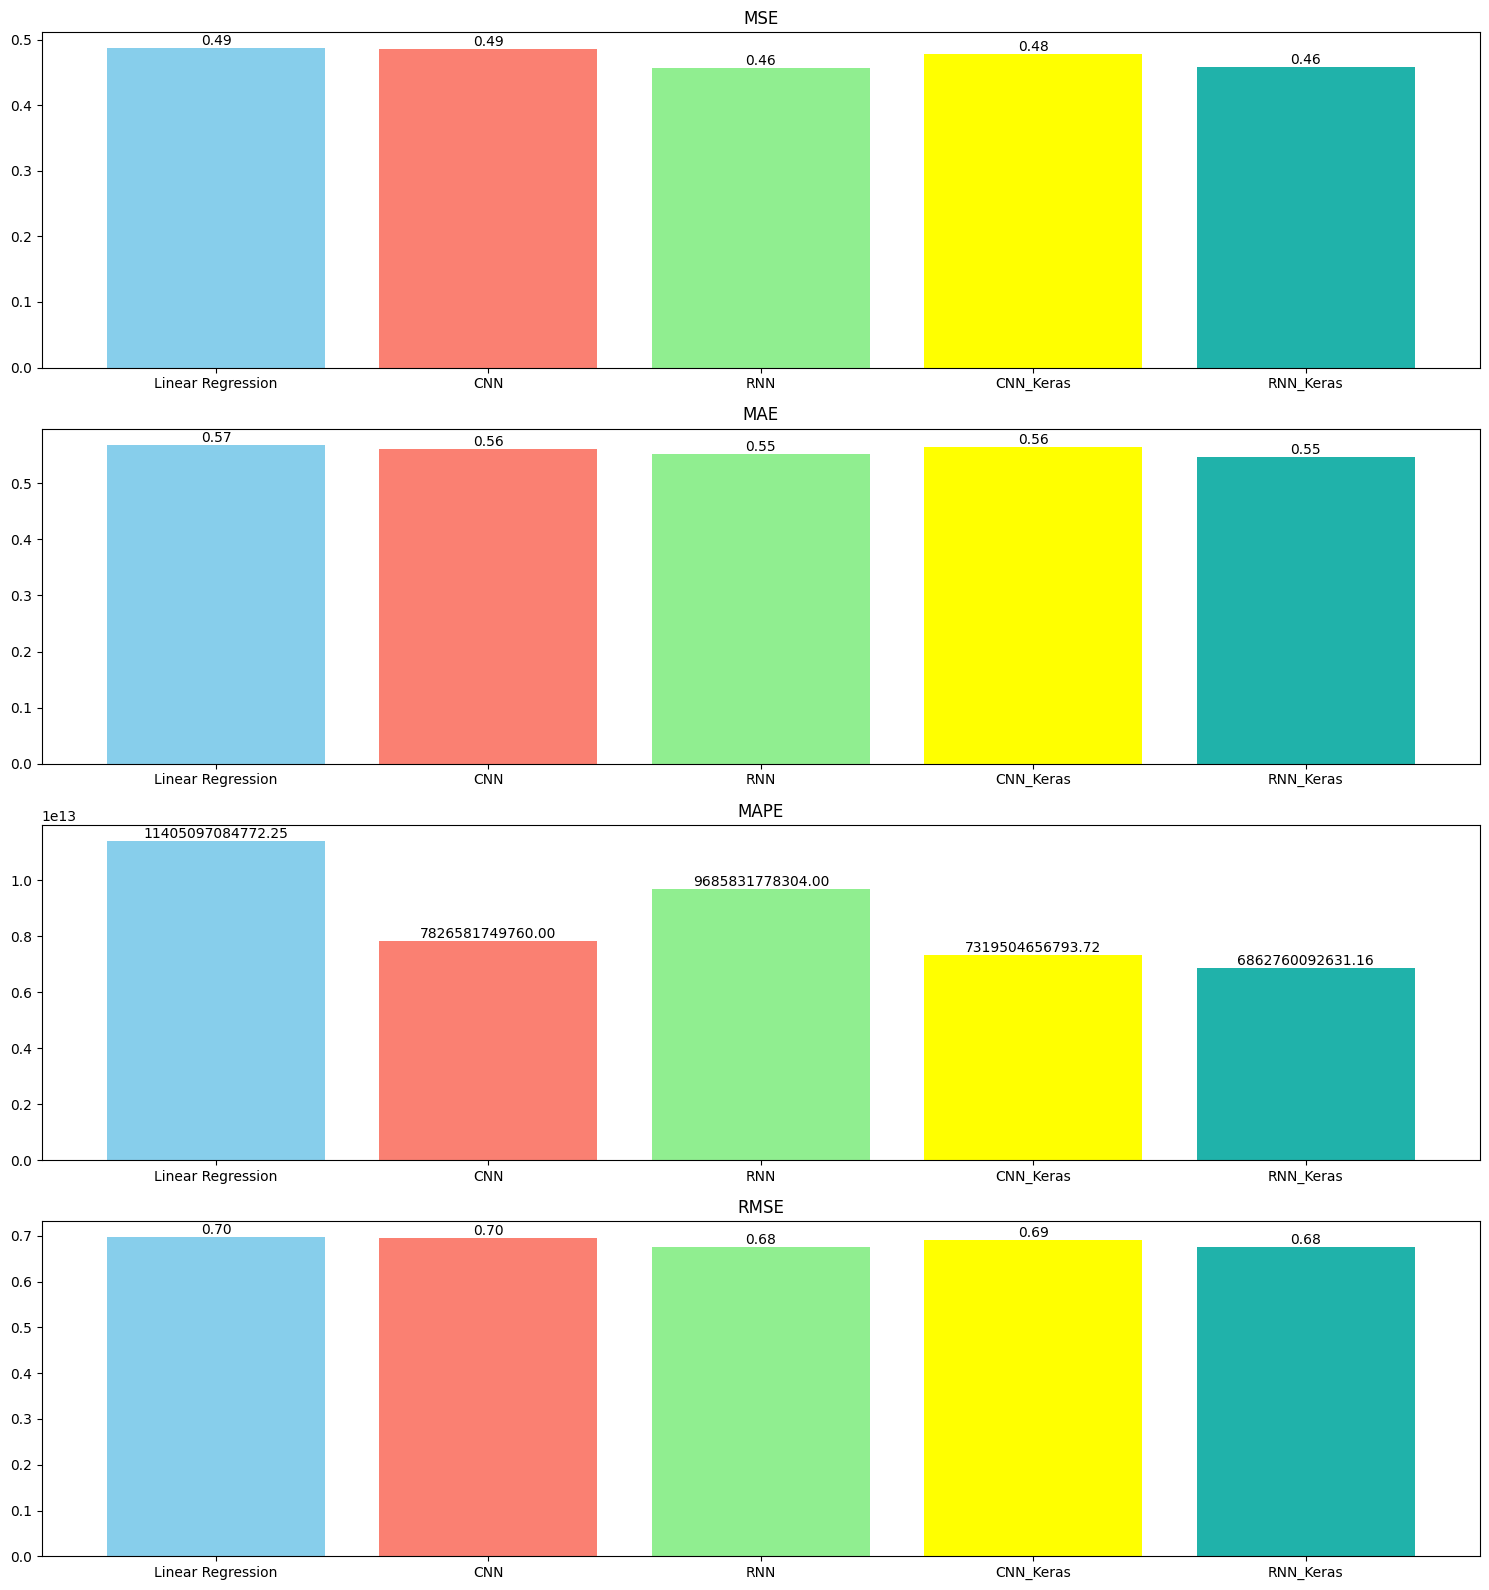

In [64]:
fig, ax = plt.subplots(4, 1, figsize=(15, 16))

bar1 = ax[0].bar(['Linear Regression', 'CNN', 'RNN', 'CNN_Keras', 'RNN_Keras'], [mse_lr, mse_cnn, mse_rnn, mse_cnn_keras, mse_rnn_keras], color=['skyblue', 'salmon', 'lightgreen', 'yellow', 'lightseagreen'])
ax[0].set_title("MSE")
for bar in bar1:
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

bar2 = ax[1].bar(['Linear Regression', 'CNN', 'RNN', 'CNN_Keras', 'RNN_Keras'], [mae_lr, mae_cnn, mae_rnn, mae_cnn_keras, mae_rnn_keras], color=['skyblue', 'salmon', 'lightgreen', 'yellow', 'lightseagreen'])
ax[1].set_title("MAE")
for bar in bar2:
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

bar3 = ax[2].bar(['Linear Regression', 'CNN', 'RNN', 'CNN_Keras', 'RNN_Keras'], [mape_lr, mape_cnn, mape_rnn, mape_cnn_keras, mape_rnn_keras], color=['skyblue', 'salmon', 'lightgreen', 'yellow', 'lightseagreen'])
ax[2].set_title("MAPE")
for bar in bar3:
    height = bar.get_height()
    ax[2].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

bar4 = ax[3].bar(['Linear Regression', 'CNN', 'RNN', 'CNN_Keras', 'RNN_Keras'], [rmse_lr, rmse_cnn, rmse_rnn, rmse_cnn_keras, rmse_rnn_keras], color=['skyblue', 'salmon', 'lightgreen', 'yellow', 'lightseagreen'])
ax[3].set_title("RMSE")
for bar in bar4:
    height = bar.get_height()
    ax[3].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [15]:
from tensorflow.keras.models import load_model

from sklearn.metrics import mean_squared_error

model = load_model('cnn.h5')
y_pred = model.predict(np.array([[0.4,0.5,0.6]]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[6.73633]], dtype=float32)